# Stock Market Prediction And Forecasting Using Stacked LSTM


In [1]:
### Used Lirary - Keras and Tensorflow 

In [2]:
#We will collect the Stock Data -- AAPL(Apple Stock Prices)
#Preprocess the Data- Train and Test
#Create a Stacked LSTM Model
#Predict the test data and plot the output
#Predict the future 30 days and plot the output

Data collection

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings

warnings.filterwarnings('ignore')

In [4]:
!pip install scipy

In [5]:
!pip install statsmodels

In [6]:
#Importing of dataset path
file_path="Tesla.csv - Tesla.csv"
df=pd.read_csv(file_path)

In [7]:
# Make a copy of the dataset
stock_df = df.copy()

In [8]:
#Importing of dataset
stock_df = pd.read_csv("Tesla.csv - Tesla.csv")

In [9]:
stock_df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [10]:
stock_df.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
8,7/12/2010,17.950001,18.070000,17.000000,17.049999,2202500,17.049999
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,2680100,18.139999


In [11]:
stock_df.tail(10)

,Date,Open,High,Low,Close,Volume,Adj Close
1682,3/6/2017,247.910004,251.699997,247.509995,251.210007,3351200,251.210007
1683,3/7/2017,251.919998,253.889999,248.320007,248.589996,3449200,248.589996
1684,3/8/2017,247.000000,250.070007,245.320007,246.869995,3725200,246.869995
1685,3/9/2017,247.630005,248.660004,243.000000,244.899994,3861500,244.899994
1686,3/10/2017,246.210007,246.500000,243.000000,243.690002,3057000,243.690002
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [12]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [13]:
stock_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [14]:
stock_df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [15]:
# Tels the rows and columns of the dataset
stock_df.nunique().to_frame(name = 'Unique Values')

,Unique Values
Date,1692
Open,1464
High,1470
Low,1468
Close,1528
Volume,1676
Adj Close,1528


In [16]:
# Tells the sum of null values
stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [17]:
stock_df.shape

(1692, 7)

<AxesSubplot:xlabel='High', ylabel='Count'>

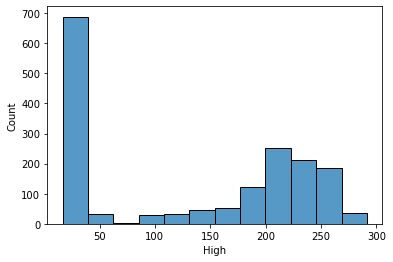

In [18]:
# 1. HISTOGRAM - sns.histplot()
sns.histplot(x='High', data=stock_df)

<AxesSubplot:xlabel='High', ylabel='Count'>

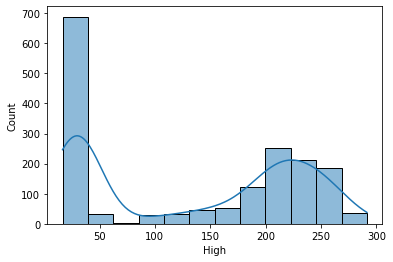

In [19]:
# with histogram - sns.histplot(kde=TRUE)
sns.histplot(x='High', data=stock_df,kde=True)

<AxesSubplot:xlabel='High', ylabel='Density'>

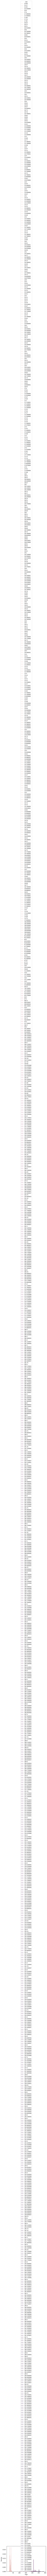

In [20]:
# 2. KDE PLOT - Kernal Density Plot - sns.kdeplot()
sns.kdeplot(x='High', data=stock_df, hue='Low')

## Checking duplicate values

In [21]:
stock_df.duplicated().sum()

0

In [22]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [23]:
stock_df.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000


In [24]:
# Tells the correlation values 
stock_df.corr()['Open'].sort_values()

Volume       0.407515
Close        0.999233
Adj Close    0.999233
Low          0.999605
High         0.999623
Open         1.000000
Name: Open, dtype: float64

<AxesSubplot:>

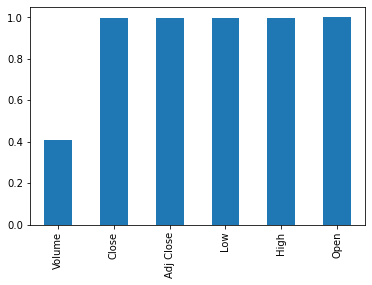

In [25]:
# ploting the graph using correlation values
stock_df.corr()['Open'].sort_values().plot(kind='bar')

In [26]:
stock_df1=stock_df.reset_index()['Close']

In [27]:
stock_df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

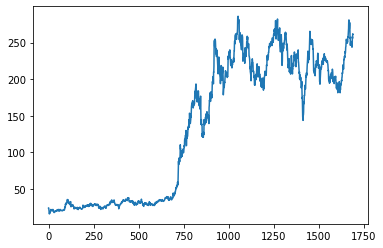

In [28]:
plt.plot(stock_df1)

### Data Preprocessing

In [29]:
stock_df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

In [30]:
hist = []
target = []
length = 90
adj_close = stock_df['Adj Close']
for i in range(len(adj_close) - length):
   x = adj_close[i:i+length]
   y = adj_close[i+length]
   hist.append(x)
   target.append(y)

In [31]:
hist[1][89] == target[0]

False

In [32]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)
print(hist.shape)
print(target.shape)

(1602, 90)
(1602, 1)


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_df1=scaler.fit_transform(np.array(stock_df1).reshape(-1,1))

In [34]:
print(stock_df1)

[[0.02993635]
 [0.02971433]
 [0.02279455]
 ...
 [0.88784039]
 [0.91122698]
 [0.9091918 ]]


In [35]:
##splitting dataset into train and test split
training_size=int(len(stock_df1)*0.65)
test_size=len(stock_df1)-training_size
train_data,test_data=stock_df1[0:training_size,:],stock_df1[training_size:len(stock_df1),:1]

In [36]:
training_size,test_size

(1099, 593)

In [37]:
train_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.82567342],
       [0.79621815],
       [0.8341474 ]])

In [38]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [39]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
print(X_train.shape), print(y_train.shape)

(998, 100)
(998,)


(None, None)

In [41]:
print(X_test.shape), print(ytest.shape)

(492, 100)
(492,)


(None, None)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [43]:
import tensorflow as tf

In [44]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 13s 366ms/step - loss: 0.0421 - val_loss: 0.0477
Epoch 2/100
16/16 [==============================] - 5s 300ms/step - loss: 0.0053 - val_loss: 0.0078
Epoch 3/100
16/16 [==============================] - 4s 271ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 4/100
16/16 [==============================] - 3s 218ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 5/100
16/16 [==============================] - 4s 252ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 6/100
16/16 [==============================] - 5s 312ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 7/100
16/16 [==============================] - 4s 271ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 8/100
16/16 [==============================] - 4s 224ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 9/100
16/16 [==============================] - 5s 306ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 10/100
16/16 [==============================] - 5s 294ms/step - loss: 0.0016 - val_l

16/16 [==============================] - 4s 251ms/step - loss: 4.6838e-04 - val_loss: 0.0011
Epoch 80/100
16/16 [==============================] - 4s 230ms/step - loss: 4.6819e-04 - val_loss: 0.0011
Epoch 81/100
16/16 [==============================] - 5s 329ms/step - loss: 4.2870e-04 - val_loss: 8.4701e-04
Epoch 82/100
16/16 [==============================] - 5s 313ms/step - loss: 4.1818e-04 - val_loss: 0.0011
Epoch 83/100
16/16 [==============================] - 4s 226ms/step - loss: 4.2631e-04 - val_loss: 8.2741e-04
Epoch 84/100
16/16 [==============================] - 5s 328ms/step - loss: 4.2108e-04 - val_loss: 7.8289e-04
Epoch 85/100
16/16 [==============================] - 5s 319ms/step - loss: 4.1664e-04 - val_loss: 0.0010
Epoch 86/100
16/16 [==============================] - 4s 279ms/step - loss: 3.8816e-04 - val_loss: 7.7573e-04
Epoch 87/100
16/16 [==============================] - 4s 277ms/step - loss: 3.8487e-04 - val_loss: 7.8238e-04
Epoch 88/100
16/16 [===================

In [48]:
history = model.fit(X_train, y_train, 
                    epochs=30, batch_size=16)

Epoch 1/30
63/63 [==============================] - 10s 159ms/step - loss: 5.5381e-04
Epoch 2/30
63/63 [==============================] - 10s 153ms/step - loss: 4.9616e-04
Epoch 3/30
63/63 [==============================] - 10s 160ms/step - loss: 5.7860e-04
Epoch 4/30
63/63 [==============================] - 9s 147ms/step - loss: 4.4633e-04
Epoch 5/30
63/63 [==============================] - 10s 154ms/step - loss: 3.4593e-04
Epoch 6/30
63/63 [==============================] - 10s 161ms/step - loss: 4.7429e-04
Epoch 7/30
63/63 [==============================] - 10s 152ms/step - loss: 5.6200e-04
Epoch 8/30
63/63 [==============================] - 10s 157ms/step - loss: 3.6239e-04
Epoch 9/30
63/63 [==============================] - 10s 153ms/step - loss: 3.4585e-04
Epoch 10/30
63/63 [==============================] - 10s 154ms/step - loss: 4.2583e-04
Epoch 11/30
63/63 [==============================] - 10s 163ms/step - loss: 3.9141e-04
Epoch 12/30
63/63 [==============================] - 

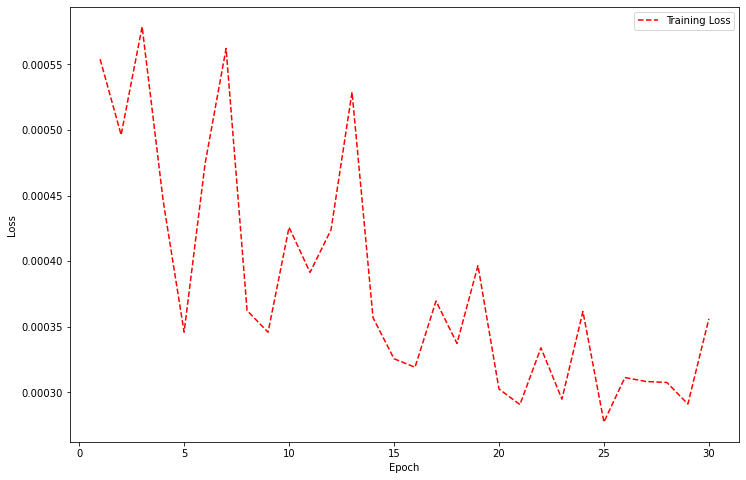

In [49]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [50]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [51]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 56ms/step


In [52]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.017163895948460683

In [53]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.02048762569567497

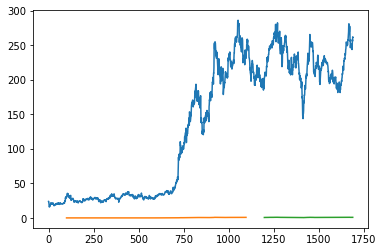

In [54]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(stock_df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(stock_df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(stock_df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
len(test_data)

593

In [56]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 252)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.8027679017728274,
 0.8234162210970027,
 0.808318523257598,
 0.7651716811480717,
 0.7843028157980856,
 0.7935908372471968,
 0.7931098203893266,
 0.7811204557797361,
 0.7917776675325673,
 0.8207148779365235,
 0.8554988058781481,
 0.8868783045370606,
 0.9236974714576774,
 0.8932800620207203,
 0.8668960893943725,
 0.8663409939421663,
 0.8585701571672165,
 0.8833999076724424,
 0.8735198088303794,
 0.8833258845843215,
 0.8809946605648611,
 0.8569049263168134,
 0.8665260257595684,
 0.8603093000933107,
 0.880513588200776,
 0.8733718144599382,
 0.8804766025596158,
 0.872076647244339,
 0.8581631115916666,
 0.8324451876405911,
 0.8362936481400132,
 0.8012137351579203,
 0.7650976580599508,
 0.7242820917756853,
 0.7368634782720126,
 0.7146240066917701,
 0.7137729261990958,
 0.7147720565684261,
 0.7085553309021685,
 0.7097764750296467,
 0.7122927271660948,
 0.6988602638775074,
 0.7229499389189259,
 0.7378996460883036,
 0.7566607171035137,
 0.7416370423522299,
 0.7478907536596477,
 0.7540704381785

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=251
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.82341622 0.80831852 0.76517168 0.78430282 0.79359084 0.79310982
 0.78112046 0.79177767 0.82071488 0.85549881 0.8868783  0.92369747
 0.89328006 0.86689609 0.86634099 0.85857016 0.88339991 0.87351981
 0.88332588 0.88099466 0.85690493 0.86652603 0.8603093  0.88051359
 0.87337181 0.8804766  0.87207665 0.85816311 0.83244519 0.83629365
 0.80121374 0.76509766 0.72428209 0.73686348 0.71462401 0.71377293
 0.71477206 0.70855533 0.70977648 0.71229273 0.69886026 0.72294994
 0.73789965 0.75666072 0.74163704 0.74789075 0.75407044 0.77457071
 0.76687384 0.76757693 0.75399642 0.7517762  0.7518872  0.75814086
 0.8012877  0.81305505 0.79026049 0.75114708 0.7477427  0.73697454
 0.74711364 0.74796472 0.73886173 0.75451447 0.75418145 0.66925695
 0.6682948  0.65626846 0.67625073 0.68824003 0.71932355 0.7270574
 0.74267315 0.7333481  0.73505031 0.74060093 0.74370927 0.77331258
 0.77283151 0.76498665 0.76128624 0.75710475 0.77875219 0.77508877
 0.78656007 0.75747481 0.76402456 0.79266573 0.7908

2 day output [[0.8903138]]
3 day input [0.78430282 0.79359084 0.79310982 0.78112046 0.79177767 0.82071488
 0.85549881 0.8868783  0.92369747 0.89328006 0.86689609 0.86634099
 0.85857016 0.88339991 0.87351981 0.88332588 0.88099466 0.85690493
 0.86652603 0.8603093  0.88051359 0.87337181 0.8804766  0.87207665
 0.85816311 0.83244519 0.83629365 0.80121374 0.76509766 0.72428209
 0.73686348 0.71462401 0.71377293 0.71477206 0.70855533 0.70977648
 0.71229273 0.69886026 0.72294994 0.73789965 0.75666072 0.74163704
 0.74789075 0.75407044 0.77457071 0.76687384 0.76757693 0.75399642
 0.7517762  0.7518872  0.75814086 0.8012877  0.81305505 0.79026049
 0.75114708 0.7477427  0.73697454 0.74711364 0.74796472 0.73886173
 0.75451447 0.75418145 0.66925695 0.6682948  0.65626846 0.67625073
 0.68824003 0.71932355 0.7270574  0.74267315 0.7333481  0.73505031
 0.74060093 0.74370927 0.77331258 0.77283151 0.76498665 0.76128624
 0.75710475 0.77875219 0.77508877 0.78656007 0.75747481 0.76402456
 0.79266573 0.79081553 

6 day output [[0.87316495]]
7 day input [0.79177767 0.82071488 0.85549881 0.8868783  0.92369747 0.89328006
 0.86689609 0.86634099 0.85857016 0.88339991 0.87351981 0.88332588
 0.88099466 0.85690493 0.86652603 0.8603093  0.88051359 0.87337181
 0.8804766  0.87207665 0.85816311 0.83244519 0.83629365 0.80121374
 0.76509766 0.72428209 0.73686348 0.71462401 0.71377293 0.71477206
 0.70855533 0.70977648 0.71229273 0.69886026 0.72294994 0.73789965
 0.75666072 0.74163704 0.74789075 0.75407044 0.77457071 0.76687384
 0.76757693 0.75399642 0.7517762  0.7518872  0.75814086 0.8012877
 0.81305505 0.79026049 0.75114708 0.7477427  0.73697454 0.74711364
 0.74796472 0.73886173 0.75451447 0.75418145 0.66925695 0.6682948
 0.65626846 0.67625073 0.68824003 0.71932355 0.7270574  0.74267315
 0.7333481  0.73505031 0.74060093 0.74370927 0.77331258 0.77283151
 0.76498665 0.76128624 0.75710475 0.77875219 0.77508877 0.78656007
 0.75747481 0.76402456 0.79266573 0.79081553 0.78704114 0.794886
 0.81035371 0.79266573 0.7

10 day output [[0.8723447]]
11 day input [0.92369747 0.89328006 0.86689609 0.86634099 0.85857016 0.88339991
 0.87351981 0.88332588 0.88099466 0.85690493 0.86652603 0.8603093
 0.88051359 0.87337181 0.8804766  0.87207665 0.85816311 0.83244519
 0.83629365 0.80121374 0.76509766 0.72428209 0.73686348 0.71462401
 0.71377293 0.71477206 0.70855533 0.70977648 0.71229273 0.69886026
 0.72294994 0.73789965 0.75666072 0.74163704 0.74789075 0.75407044
 0.77457071 0.76687384 0.76757693 0.75399642 0.7517762  0.7518872
 0.75814086 0.8012877  0.81305505 0.79026049 0.75114708 0.7477427
 0.73697454 0.74711364 0.74796472 0.73886173 0.75451447 0.75418145
 0.66925695 0.6682948  0.65626846 0.67625073 0.68824003 0.71932355
 0.7270574  0.74267315 0.7333481  0.73505031 0.74060093 0.74370927
 0.77331258 0.77283151 0.76498665 0.76128624 0.75710475 0.77875219
 0.77508877 0.78656007 0.75747481 0.76402456 0.79266573 0.79081553
 0.78704114 0.794886   0.81035371 0.79266573 0.78226758 0.77704998
 0.794886   0.79273976 0

13 day output [[0.87535655]]
14 day input [0.86634099 0.85857016 0.88339991 0.87351981 0.88332588 0.88099466
 0.85690493 0.86652603 0.8603093  0.88051359 0.87337181 0.8804766
 0.87207665 0.85816311 0.83244519 0.83629365 0.80121374 0.76509766
 0.72428209 0.73686348 0.71462401 0.71377293 0.71477206 0.70855533
 0.70977648 0.71229273 0.69886026 0.72294994 0.73789965 0.75666072
 0.74163704 0.74789075 0.75407044 0.77457071 0.76687384 0.76757693
 0.75399642 0.7517762  0.7518872  0.75814086 0.8012877  0.81305505
 0.79026049 0.75114708 0.7477427  0.73697454 0.74711364 0.74796472
 0.73886173 0.75451447 0.75418145 0.66925695 0.6682948  0.65626846
 0.67625073 0.68824003 0.71932355 0.7270574  0.74267315 0.7333481
 0.73505031 0.74060093 0.74370927 0.77331258 0.77283151 0.76498665
 0.76128624 0.75710475 0.77875219 0.77508877 0.78656007 0.75747481
 0.76402456 0.79266573 0.79081553 0.78704114 0.794886   0.81035371
 0.79266573 0.78226758 0.77704998 0.794886   0.79273976 0.77841917
 0.78922437 0.77653192

17 day output [[0.87600946]]
18 day input [0.88332588 0.88099466 0.85690493 0.86652603 0.8603093  0.88051359
 0.87337181 0.8804766  0.87207665 0.85816311 0.83244519 0.83629365
 0.80121374 0.76509766 0.72428209 0.73686348 0.71462401 0.71377293
 0.71477206 0.70855533 0.70977648 0.71229273 0.69886026 0.72294994
 0.73789965 0.75666072 0.74163704 0.74789075 0.75407044 0.77457071
 0.76687384 0.76757693 0.75399642 0.7517762  0.7518872  0.75814086
 0.8012877  0.81305505 0.79026049 0.75114708 0.7477427  0.73697454
 0.74711364 0.74796472 0.73886173 0.75451447 0.75418145 0.66925695
 0.6682948  0.65626846 0.67625073 0.68824003 0.71932355 0.7270574
 0.74267315 0.7333481  0.73505031 0.74060093 0.74370927 0.77331258
 0.77283151 0.76498665 0.76128624 0.75710475 0.77875219 0.77508877
 0.78656007 0.75747481 0.76402456 0.79266573 0.79081553 0.78704114
 0.794886   0.81035371 0.79266573 0.78226758 0.77704998 0.794886
 0.79273976 0.77841917 0.78922437 0.77653192 0.77379365 0.77638393
 0.77630991 0.7689831  

22 day input [0.8603093  0.88051359 0.87337181 0.8804766  0.87207665 0.85816311
 0.83244519 0.83629365 0.80121374 0.76509766 0.72428209 0.73686348
 0.71462401 0.71377293 0.71477206 0.70855533 0.70977648 0.71229273
 0.69886026 0.72294994 0.73789965 0.75666072 0.74163704 0.74789075
 0.75407044 0.77457071 0.76687384 0.76757693 0.75399642 0.7517762
 0.7518872  0.75814086 0.8012877  0.81305505 0.79026049 0.75114708
 0.7477427  0.73697454 0.74711364 0.74796472 0.73886173 0.75451447
 0.75418145 0.66925695 0.6682948  0.65626846 0.67625073 0.68824003
 0.71932355 0.7270574  0.74267315 0.7333481  0.73505031 0.74060093
 0.74370927 0.77331258 0.77283151 0.76498665 0.76128624 0.75710475
 0.77875219 0.77508877 0.78656007 0.75747481 0.76402456 0.79266573
 0.79081553 0.78704114 0.794886   0.81035371 0.79266573 0.78226758
 0.77704998 0.794886   0.79273976 0.77841917 0.78922437 0.77653192
 0.77379365 0.77638393 0.77630991 0.7689831  0.76761397 0.76861304
 0.77412668 0.76646679 0.7735346  0.76531967 0.759

24 day output [[0.871611]]
25 day input [0.8804766  0.87207665 0.85816311 0.83244519 0.83629365 0.80121374
 0.76509766 0.72428209 0.73686348 0.71462401 0.71377293 0.71477206
 0.70855533 0.70977648 0.71229273 0.69886026 0.72294994 0.73789965
 0.75666072 0.74163704 0.74789075 0.75407044 0.77457071 0.76687384
 0.76757693 0.75399642 0.7517762  0.7518872  0.75814086 0.8012877
 0.81305505 0.79026049 0.75114708 0.7477427  0.73697454 0.74711364
 0.74796472 0.73886173 0.75451447 0.75418145 0.66925695 0.6682948
 0.65626846 0.67625073 0.68824003 0.71932355 0.7270574  0.74267315
 0.7333481  0.73505031 0.74060093 0.74370927 0.77331258 0.77283151
 0.76498665 0.76128624 0.75710475 0.77875219 0.77508877 0.78656007
 0.75747481 0.76402456 0.79266573 0.79081553 0.78704114 0.794886
 0.81035371 0.79266573 0.78226758 0.77704998 0.794886   0.79273976
 0.77841917 0.78922437 0.77653192 0.77379365 0.77638393 0.77630991
 0.7689831  0.76761397 0.76861304 0.77412668 0.76646679 0.7735346
 0.76531967 0.75917703 0.75

28 day output [[0.87034434]]
29 day input [0.83629365 0.80121374 0.76509766 0.72428209 0.73686348 0.71462401
 0.71377293 0.71477206 0.70855533 0.70977648 0.71229273 0.69886026
 0.72294994 0.73789965 0.75666072 0.74163704 0.74789075 0.75407044
 0.77457071 0.76687384 0.76757693 0.75399642 0.7517762  0.7518872
 0.75814086 0.8012877  0.81305505 0.79026049 0.75114708 0.7477427
 0.73697454 0.74711364 0.74796472 0.73886173 0.75451447 0.75418145
 0.66925695 0.6682948  0.65626846 0.67625073 0.68824003 0.71932355
 0.7270574  0.74267315 0.7333481  0.73505031 0.74060093 0.74370927
 0.77331258 0.77283151 0.76498665 0.76128624 0.75710475 0.77875219
 0.77508877 0.78656007 0.75747481 0.76402456 0.79266573 0.79081553
 0.78704114 0.794886   0.81035371 0.79266573 0.78226758 0.77704998
 0.794886   0.79273976 0.77841917 0.78922437 0.77653192 0.77379365
 0.77638393 0.77630991 0.7689831  0.76761397 0.76861304 0.77412668
 0.76646679 0.7735346  0.76531967 0.75917703 0.75558762 0.7378626
 0.723579   0.72605828 

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(stock_df1)

1692

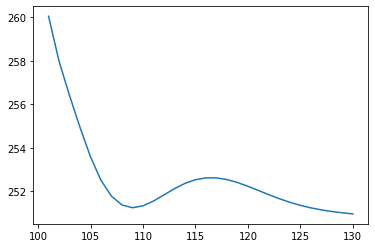

In [63]:

plt.plot(day_pred,scaler.inverse_transform(lst_output))

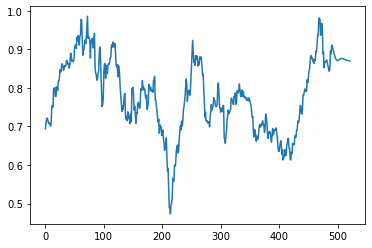

In [64]:
df3=stock_df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [65]:
df3=scaler.inverse_transform(df3).tolist()

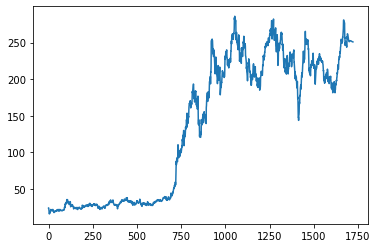

In [66]:
plt.plot(df3)